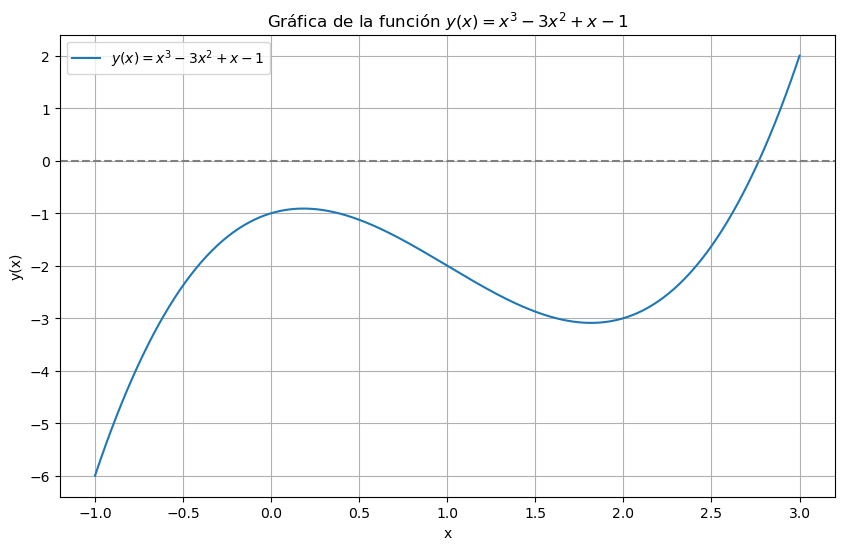

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root_scalar

# Definir la función
def f(x: float, points: list[float] = [], show: bool = False):
    y = x**3 - 3 * x**2 + x - 1
    points.append((x, y))
    if show:
        print(f"f({x}) = {y}")
    return y

# 1. Dibujar la ecuación
x_vals = np.linspace(-1, 3, 400)
y_vals = f(x_vals)

plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label=r'$y(x) = x^3 - 3x^2 + x - 1$')
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('Gráfica de la función $y(x) = x^3 - 3x^2 + x - 1$')
plt.legend()
plt.grid()
plt.show()

In [31]:
from scipy.optimize import newton
# Lista para almacenar las estimaciones visitadas
estimations = []
# Definir la derivada de la función
def f_prime(x):
    return 3*x**2 - 6*x + 1
# Función auxiliar para almacenar las estimaciones
def f_with_trace(x):
    estimations.append(x)  # Guardar cada estimación en la lista
    return f(x)

# Llamar a newton con full_output=True para obtener más información
x0 = 100
x_r = newton(f_with_trace, x0, f_prime, full_output=True)

# Resultado final y todas las estimaciones visitadas
print("Raíz encontrada:", x_r[0])
print("Estimaciones visitadas:", estimations)

Raíz encontrada: 2.7692923542386314
Estimaciones visitadas: [100.0, 67.00455766810653, 45.009926065596666, 30.35039723527028, 20.582860416480248, 14.079716839009599, 9.757835905944379, 6.898518561069087, 5.028701696557697, 3.843680657951718, 3.1559707952275144, 2.8454158843448356, 2.773143092634202, 2.7693029596247096, 2.7692923543194023]


In [33]:
# 3. Mostrar las estimaciones visitadas por el algoritmo
for i, guess in enumerate(initial_guesses):
    if i < len(roots):
        print(f"Estimación inicial: {guess}")
        print(f"Raíz encontrada: {roots[i]}")
        print(f"Total de iteraciones: {trajectories[i]}")


Estimación inicial: 0
Raíz encontrada: 2.769292354238633
Total de iteraciones: 25
Estimación inicial: 1
Raíz encontrada: 2.7692923542386425
Total de iteraciones: 10


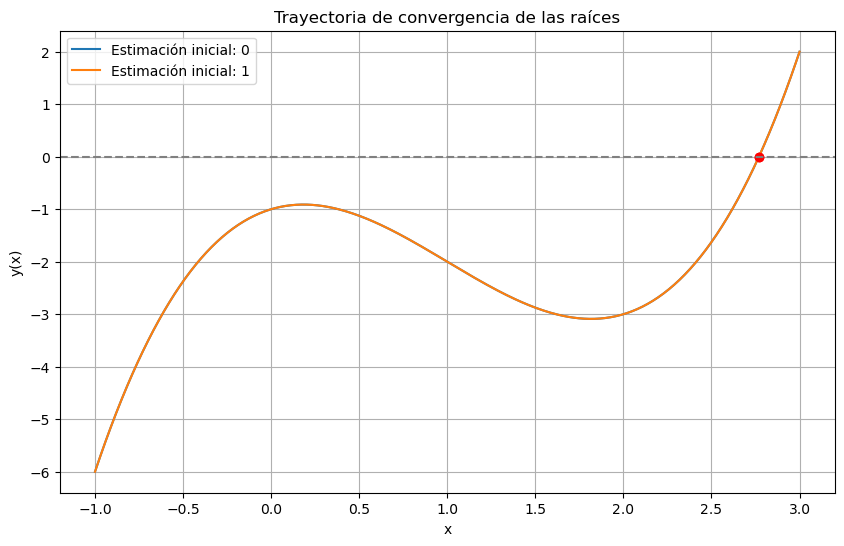

In [35]:
# 4. Dibujar la trayectoria de las raíces
plt.figure(figsize=(10, 6))
for i, guess in enumerate(initial_guesses):
    if i < len(roots):
        plt.plot(x_vals, y_vals, label=f'Estimación inicial: {guess}')
        plt.plot(roots[i], f(roots[i]), 'ro')  # Punto donde se encontró la raíz

plt.axhline(0, color='gray', linestyle='--')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('Trayectoria de convergencia de las raíces')
plt.legend()
plt.grid()
plt.show()

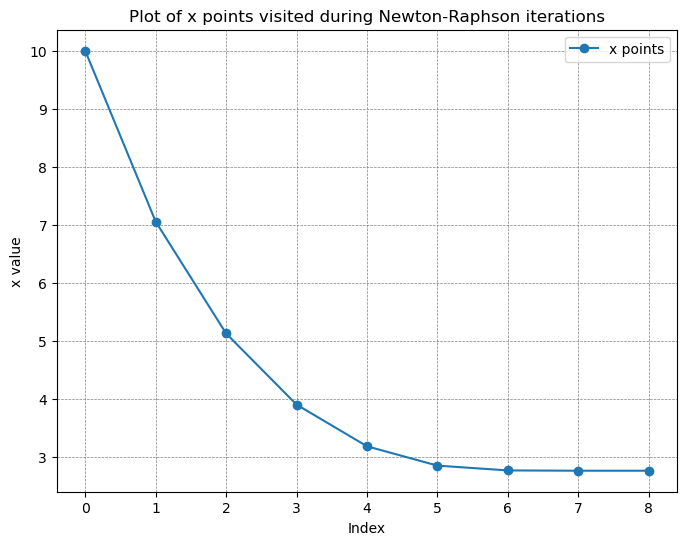

In [45]:
# Lista para almacenar las estimaciones visitadas
points = []

# Función auxiliar para almacenar las estimaciones
def f_with_trace(x):
    points.append([x])  # Guardar cada estimación en la lista como [x]
    return f(x)

# Llamar a newton con la derivada para usar el método de Newton-Raphson
x0 = 10
x_r = newton(f_with_trace, x0, fprime=f_prime, full_output=True)

# Extraer valores de x desde points
x_points = [point[0] for point in points]

# Graficar los puntos de x visitados
plt.figure(figsize=(8, 6))
plt.plot(x_points, "o-", label="x points")
plt.grid(color="gray", linestyle="--", linewidth=0.5)
plt.title("Plot of x points visited during Newton-Raphson iterations")
plt.xlabel("Index")
plt.ylabel("x value")
plt.legend()
plt.show()